<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Data Science and AI
## Lab 7.1.1: Decision Trees

INSTRUCTIONS:

- Read the guides and hints, then create the necessary analysis and code for the scenario below.
- The baseline results (minimum) are:
    - **Accuracy** = 0.6895
    - **ROC AUC**  = 0.5690
- Try to achieve better results!

# Foreword
It is common that companies and professionals start with the data immediately available. Although this approach works, ideally the first step is to identify the problem or question and only then identify and obtain the set of data that can help to solve or answer the problem.

Also, given the current abundance of data, processing power and some particular machine learning methods, there could be a temptation to use ALL the data available. **Quality** is _**better**_ then **Quantity**!

Part of calling this discipline **Data Science** is that it is supposed to follow a process and not reach conclusions without support from evidence.

Moreover, it is a creative, exploratory, labourious and iterative processes. It is part of the process to repeat, review and change when finding a dead-end.

# Step 1: Define the problem or question
Identify the subject matter and the given or obvious questions that would be relevant in the field.

## Potential Questions
List the given or obvious questions.
Is this guy going to donate blood in march 2007 or not
## Actual Question
Choose the **one** question that should be answered.
Is this guy going to donate blood in march 2007 or not

# Step 2: Find the Data
### Blood Transfusion Service Center DataSet
- **Abstract**: Data taken from the **Blood Transfusion Service Center** in Hsin-Chu City in Taiwan.
- Date Donated: 2008-10-03
- Source:
        Original Owner and Donor: Prof. I-Cheng Yeh
        Department of Information Management
        Chung-Hua University,
        Hsin Chu, Taiwan 30067, R.O.C.

- Citation Request:
    **NOTE**: Reuse of this database is unlimited with retention of copyright notice for Prof. I-Cheng Yeh and the following published paper:

        Yeh, I-Cheng, Yang, King-Jang, and Ting, Tao-Ming, "Knowledge discovery on RFM model using Bernoulli sequence, "Expert Systems with Applications, 2008
        
### UCI - Machine Learning Repository
- Center for Machine Learning and Intelligent Systems

The [**UCI Machine Learning Repository**](https://archive.ics.uci.edu/ml/datasets/Blood+Transfusion+Service+Center) is a collection of databases, domain theories, and data generators that are used by the machine learning community for the empirical analysis of machine learning algorithms.

# Step 3: Read the Data
- Read the data
- Perform some basic structural cleaning to facilitate the work

In [27]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score

In [2]:
import os

os.getcwd()

'C:\\Users\\samhe\\OneDrive\\Documents\\IOD\\module 7'

In [3]:
pip install fsspec

Note: you may need to restart the kernel to use updated packages.


In [5]:
# Read data in pandas
df = pd.read_csv(r'C://Users//samhe//OneDrive/Documents/IOD/DATA/transfusion.data')
df

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
...,...,...,...,...,...
743,23,2,500,38,0
744,21,2,500,52,0
745,23,3,750,62,0
746,39,1,250,39,0


In [12]:
df.columns = ['recency','frequency','monetary','time','donated_blood_in_March_2007']

In [13]:
df

,recency,frequency,monetary,time,donated_blood_in_March_2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
...,...,...,...,...,...
743,23,2,500,38,0
744,21,2,500,52,0
745,23,3,750,62,0
746,39,1,250,39,0


# Step 4: Explore and Clean the Data
- Perform some initial simple **EDA** (Exploratory Data Analysis)
- Check for
    - **Number of features**
    - **Data types**
    - **Domains, Intervals**
    - **Outliers** (are they valid or spurious data [read or measure errors])
    - **Null** (values not present or coded [as zero of empty strings])
    - **Missing Values** (coded [as zero of empty strings] or values not present)
    - **Coded content** (classes identified by numbers or codes to represent absence of data)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Recency                      748 non-null    int64
 1   Frequency                    748 non-null    int64
 2   Monetary                     748 non-null    int64
 3   Time                         748 non-null    int64
 4   donated_blood_in_March_2007  748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


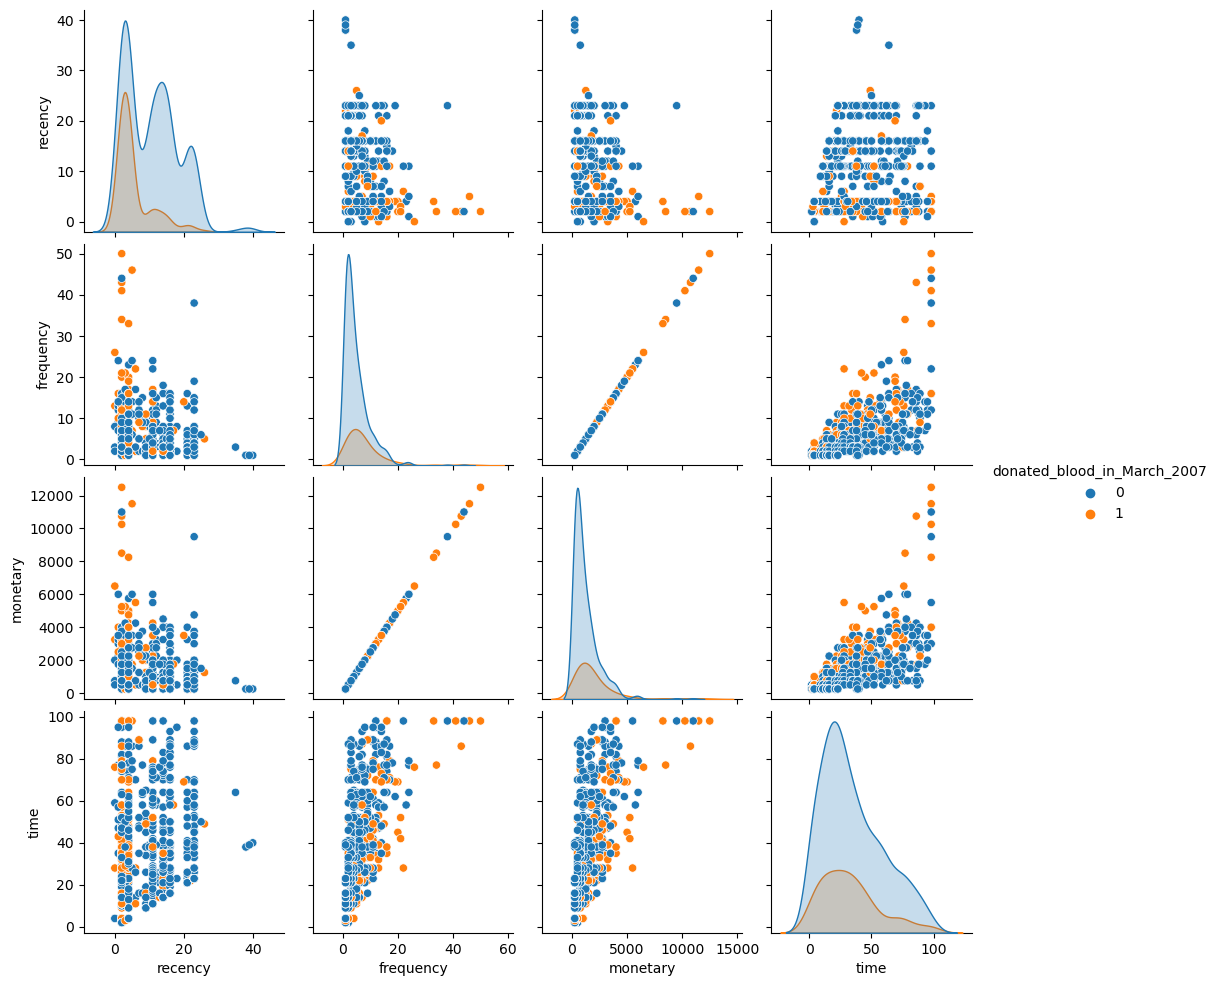

In [21]:
sns.pairplot(df,hue='donated_blood_in_March_2007')

In [15]:
df[df['recency']>= 60]

,recency,frequency,monetary,time,donated_blood_in_March_2007
499,74,1,250,74,0
747,72,1,250,72,0


# Step 5: Prepare the Data
- Deal with the data as required by the modelling technique
    - **Outliers** (remove or adjust if possible or necessary)
    - **Null** (remove or interpolate if possible or necessary)
    - **Missing Values** (remove or interpolate if possible or necessary)
    - **Coded content** (transform if possible or necessary [str to number or vice-versa])
    - **Normalisation** (if possible or necessary)
    - **Feature Engineer** (if useful or necessary)

# Step 6: Modelling
Refer to the Problem and Main Question.
- What are the input variables (features)?
- Is there an output variable (label)?
- If there is an output variable:
    - What is it?
    - What is its type?
- What type of Modelling is it?
    - [ ] Supervised
    - [ ] Unsupervised
- What type of Modelling is it?
    - [ ] Regression
    - [ ] Classification (binary)
    - [ ] Classification (multi-class)
    - [ ] Clustering

# Step 7: Split the Data

Need to check for **Supervised** modelling:
- Number of known cases or observations
- Define the split in Training/Test or Training/Validation/Test and their proportions
- Check for unbalanced classes and how to keep or avoid it when splitting

In [33]:
X=df[['monetary']]
y=df ['donated_blood_in_March_2007']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

# Step 8: Define a Model

Define the model and its hyper-parameters.

Consider the parameters and hyper-parameters of each model at each (re)run and after checking the efficiency of a model against the training and test datasets.

In [35]:
class_weights = [{0:x, 1:1.0-x} for x in np.linspace(0.001,1,20)]
    
# Define the hyperparameter grid
param_grid = {'criterion': ['gini', 'entropy', 'log_loss'],
              'max_depth': np.arange(1, 10),
              'min_samples_split': np.arange(1, 10),
              'min_samples_leaf': np.arange(1, 10),
              'max_features': [None, 'sqrt', 'log2'],
              'class_weight': class_weights} 

In [36]:
dt = DecisionTreeClassifier(random_state=0)


# Step 9: Fit the Model

In [37]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [38]:
dt.score(X_train,y_train)

0.778175313059034

In [39]:
dt.score(X_test,y_test)

0.7593582887700535

# Step 10: Verify and Evaluate the Training Model
- Use the **training** data to make predictions
- What metrics are appropriate for the modelling approach used
- For **Supervised** models:
    - Check the **Training Results** with the **Training Predictions** during development
- Analyse, modify the parameters and hyper-parameters and repeat (within reason) until the model does not improve

In [40]:
# predict test class:
y_pred = dt.predict(X_test)

# predicted test probability:
y_pp = dt.predict_proba(X_test)

In [41]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [42]:
y_pp

array([[0.87610619, 0.12389381],
       [0.83333333, 0.16666667],
       [0.68888889, 0.31111111],
       [0.79591837, 0.20408163],
       [0.79591837, 0.20408163],
       [0.83333333, 0.16666667],
       [0.63636364, 0.36363636],
       [0.66666667, 0.33333333],
       [0.68888889, 0.31111111],
       [0.83333333, 0.16666667],
       [0.87610619, 0.12389381],
       [0.8358209 , 0.1641791 ],
       [0.79591837, 0.20408163],
       [0.83333333, 0.16666667],
       [0.8358209 , 0.1641791 ],
       [0.68888889, 0.31111111],
       [0.66666667, 0.33333333],
       [0.33333333, 0.66666667],
       [0.87610619, 0.12389381],
       [0.87610619, 0.12389381],
       [0.87610619, 0.12389381],
       [0.87610619, 0.12389381],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.87610619, 0.12389381],
       [0.68421053, 0.31578947],
       [0.87610619, 0.12389381],
       [0.68421053, 0.31578947],
       [0.8358209 , 0.1641791 ],
       [0.87610619, 0.12389381],
       [0.

In [43]:
rf_gride= GridSearchCV(dt, param_grid, cv=5, verbose=1)
rf_gride.fit(X_train, y_train)

Fitting 5 folds for each of 131220 candidates, totalling 656100 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'class_weight': [{0: 0.001, 1: 0.999},
                                          {0: 0.05357894736842105,
                                           1: 0.9464210526315789},
                                          {0: 0.1061578947368421,
                                           1: 0.8938421052631579},
                                          {0: 0.15873684210526315,
                                           1: 0.8412631578947368},
                                          {0: 0.2113157894736842,
                                           1: 0.7886842105263158},
                                          {0: 0.26389473684210524,
                                           1: 0.7361052631578948},
                                          {0: 0.316473684...
                                          {0: 0.8422631578947368,
                                           1: 0.15773684210526318},
                                          {0: 0.8948421052631579,
                                           1: 0.10515789473684212},
                                          {0: 0.9474210526315789,
                                           1: 0.05257894736842106},
                                          {0: 1.0, 1: 0.0}],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_split': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
             verbose=1)

In [47]:
rf_gride.score(X_train, y_train)

0.7728085867620751

# Step 11: Make Predictions and Evaluate the Test Model
**NOTE**: **Do this only after not making any more improvements in the model**.

- Use the **test** data to make predictions
- For **Supervised** models:
    - Check the **Test Results** with the **Test Predictions**

# Step 12: Solve the Problem or Answer the Question
The results of an analysis or modelling can be used:
- As part of a product or process, so the model can make predictions when new input data is available
- As part of a report including text and charts to help understand the problem
- As input for further questions



---



---



> > > > > > > > > © 2024 Institute of Data


---



---



